# Proyecto 01

In [315]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
proyecto_data = np.load('./data/proyecto_training_data.npy')

In [3]:
proyecto_data

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [4]:
type(proyecto_data)

numpy.ndarray

In [5]:
data_train, data_test = train_test_split(proyecto_data, test_size=0.2)

In [6]:
len(data_train)

1168

In [7]:
len(data_test)

292

In [8]:
df_train = pd.DataFrame(data_train)
df_test = pd.DataFrame(data_test)

In [9]:
df_train = df_train.rename(columns={0: "SalePrice", 1: "OverallQual", 2: "1stFlrSF", 3: "TotRmsAbvGrd", 4: "YearBuilt", 5: "LotFrontage"})
df_test = df_test.rename(columns={0: "SalePrice", 1: "OverallQual", 2: "1stFlrSF", 3: "TotRmsAbvGrd", 4: "YearBuilt", 5: "LotFrontage"})

In [10]:
df_train.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,968.000000
mean,180602.636130,6.089897,1168.558219,6.487158,1971.372432,70.045455
std,80740.648437,1.400686,397.360259,1.629265,30.116640,24.913003
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,128987.500000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,162900.000000,6.000000,1088.000000,6.000000,1972.000000,69.000000
75%,214000.000000,7.000000,1414.000000,7.000000,2001.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1168 non-null   float64
 1   OverallQual   1168 non-null   float64
 2   1stFlrSF      1168 non-null   float64
 3   TotRmsAbvGrd  1168 non-null   float64
 4   YearBuilt     1168 non-null   float64
 5   LotFrontage   968 non-null    float64
dtypes: float64(6)
memory usage: 54.9 KB


In [12]:
np.ptp(data_train, axis=0)

array([7.201e+05, 9.000e+00, 4.358e+03, 1.200e+01, 1.350e+02,       nan])

In [13]:
df_test.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,292.000000,292.000000,292.000000,292.000000,292.000000,233.000000
mean,182195.434932,6.136986,1138.900685,6.640411,1970.849315,70.068670
std,74140.774514,1.311488,339.691229,1.606733,30.594082,21.528139
min,68500.000000,3.000000,483.000000,3.000000,1872.000000,21.000000
25%,135862.500000,5.000000,876.000000,6.000000,1954.000000,60.000000
50%,163995.000000,6.000000,1081.000000,7.000000,1975.000000,70.000000
75%,213492.500000,7.000000,1299.500000,7.000000,1999.000000,82.000000
max,625000.000000,10.000000,2234.000000,12.000000,2009.000000,134.000000


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     292 non-null    float64
 1   OverallQual   292 non-null    float64
 2   1stFlrSF      292 non-null    float64
 3   TotRmsAbvGrd  292 non-null    float64
 4   YearBuilt     292 non-null    float64
 5   LotFrontage   233 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


In [15]:
np.ptp(data_test, axis=0)

array([5.565e+05, 7.000e+00, 1.751e+03, 9.000e+00, 1.370e+02,       nan])

<Axes: xlabel='LotFrontage', ylabel='Count'>

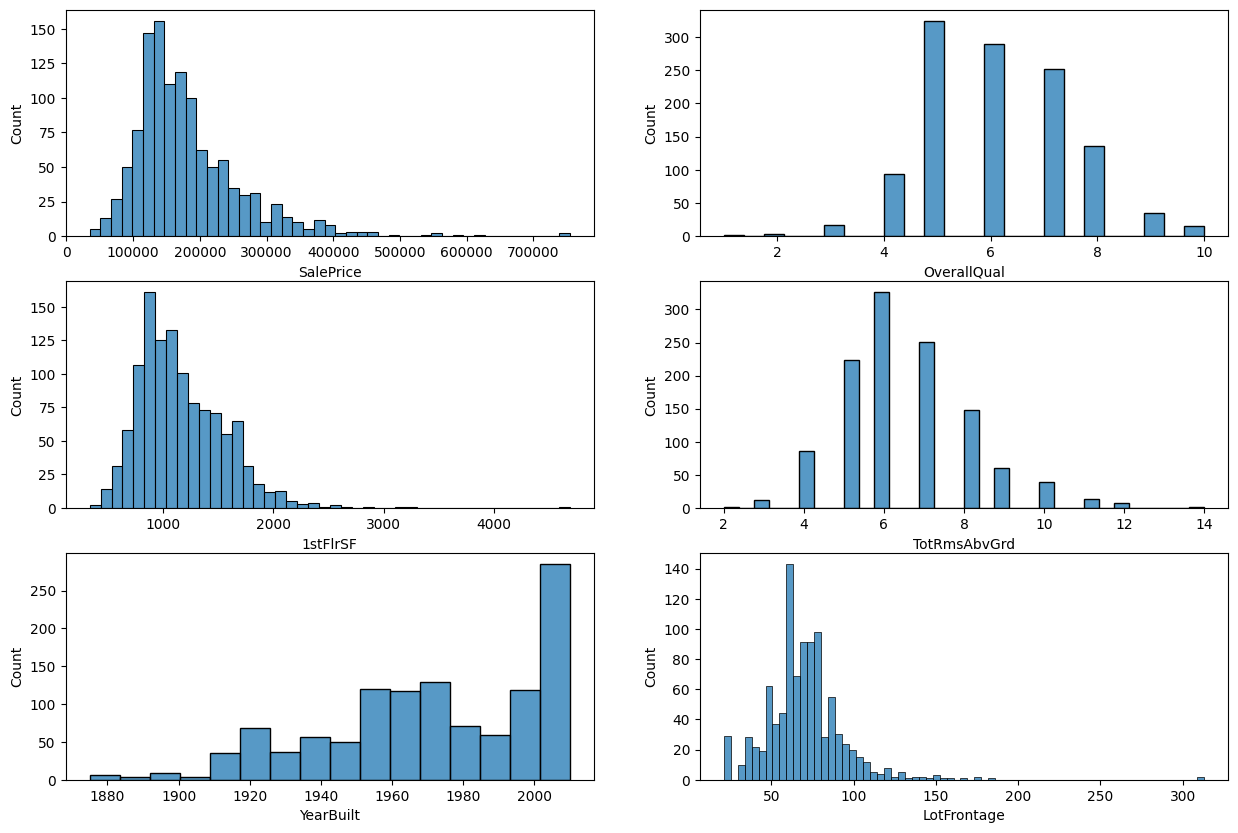

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
sns.histplot(data=df_train["SalePrice"], ax=axes[0,0])
sns.histplot(data=df_train["OverallQual"], ax=axes[0,1])
sns.histplot(data=df_train["1stFlrSF"], ax=axes[1,0])
sns.histplot(data=df_train["TotRmsAbvGrd"], ax=axes[1,1])
sns.histplot(data=df_train["YearBuilt"], ax=axes[2,0])
sns.histplot(data=df_train["LotFrontage"], ax=axes[2,1])

In [17]:
ind_var_columns = ["OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]

Corr OverallQual: 0.7934496502084704


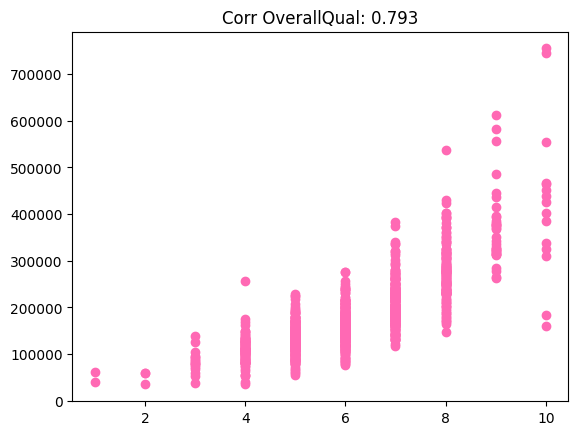

Corr 1stFlrSF: 0.6079076478042922


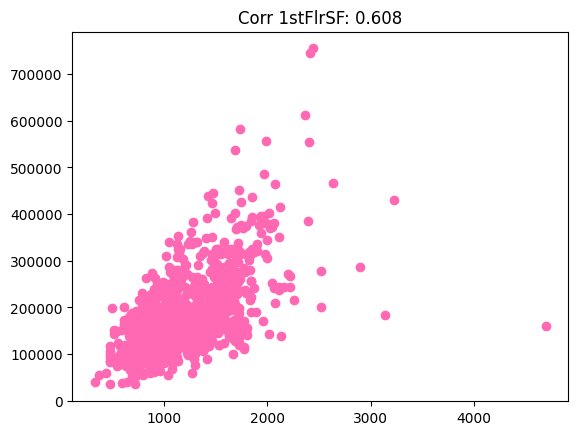

Corr TotRmsAbvGrd: 0.5379796975522863


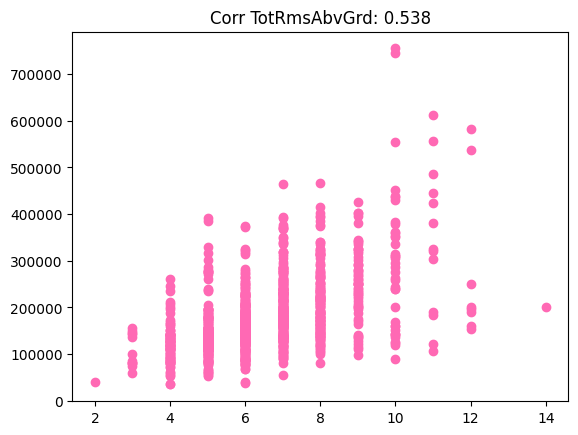

Corr YearBuilt: 0.5395929297814697


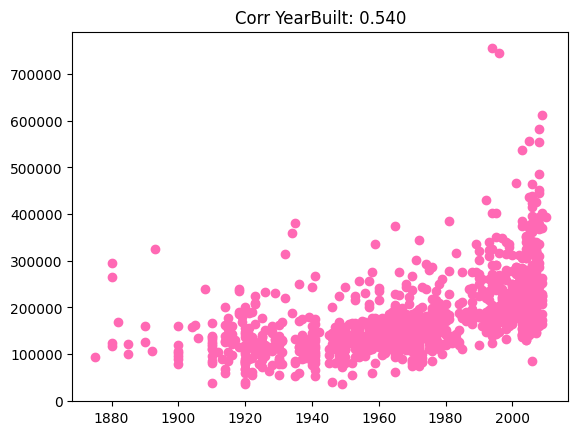

Corr LotFrontage: 0.3457761414227757


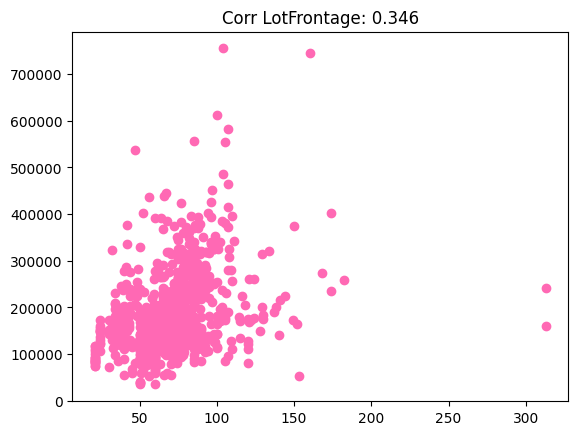

In [18]:
for colName in ind_var_columns:
    corr = df_train[colName].corr(df_train["SalePrice"])
    print(f"Corr {colName}: {corr}")
    plt.scatter(df_train[colName], df_train["SalePrice"], color = 'hotpink')
    plt.title(f"Corr {colName}: {'%.3f' % corr}")
    plt.show()

In [19]:
corr_columns = ["OverallQual", "1stFlrSF"]

In [274]:
x = df_train["OverallQual"]
y = df_train["SalePrice"]

In [31]:
matriz = np.column_stack((x, np.ones(len(x))))

In [33]:
x

0       6.0
1       8.0
2       5.0
3       5.0
4       5.0
       ... 
1163    5.0
1164    5.0
1165    7.0
1166    8.0
1167    6.0
Name: OverallQual, Length: 1168, dtype: float64

In [34]:
x_mean = x.mean()
y_mean = y.mean()

In [96]:
B1_num = ((x - x_mean) * (y - y_mean)).sum()
B1_den = ((x - x_mean)**2).sum()
B1 = B1_num / B1_den

B0 = y_mean - (B1*x_mean)

In [36]:
epochs = 5

In [38]:
y_iter = np.dot(matriz, [B1, B0])

In [39]:
y_iter

array([176490.97417889, 267965.66292288, 130753.62980689, ...,
       222228.31855088, 267965.66292288, 176490.97417889])

In [57]:
error = sum(np.square((y-y_iter)))/(2*len(y))

In [58]:
error

1206417440.685123

In [60]:
grad_b1 = sum((y_iter-y)*x)/len(y)

In [61]:
grad_b1

-1.7781244361237305e-10

In [62]:
grad_b0 = sum((y_iter-y))/len(y)

In [63]:
grad_b0

-2.2650155723605253e-11

## actualizar parametros

In [95]:
alfa = 10000000000

In [97]:
B0 = B0 - alfa*grad_b0
B1 = B1 - alfa*grad_b1

In [98]:
y_iter = np.dot(matriz, [B1, B0])

In [99]:
error_2 = sum(np.square((y-y_iter)))/(2*len(y))

In [100]:
error_2

1206417504.8915799

In [101]:
error

1206417440.685123

# Como funcion

In [216]:
def regresion_lineal(x,y,epochs,alfa,b0,b1,imprimir_error_cada):
    
    iteration_df = pd.DataFrame(columns=['iter', 'b1', 'b0', 'error'])
    print_count = 0
    
    for i in range(0, epochs):
    
        matriz = np.column_stack((x, np.ones(len(x))))
        y_iter = np.dot(matriz, [b1, b0])

        error = sum(np.square((y-y_iter)))/(2*len(y))
        
        new_row = pd.Series({
            'iter': i+1,
            'b1': b1,
            'b0': b0,
            'error': error
        })
        
        
        iteration_df = pd.concat([iteration_df, new_row.to_frame().T], ignore_index=True)
        
        print_count+=1
        
        if(print_count == imprimir_error_cada):
            print_count = 0
            print( 'Iteracion: {}, error: {}'.format( i+1, error))

        grad_b1 = sum((y_iter-y)*x)/len(y)
        grad_b0 = sum((y_iter-y))/len(y)
        
        b0 = b0 - alfa*grad_b0
        b1 = b1 - alfa*grad_b1
    return iteration_df
    
    

In [280]:
iteration_df = regresion_lineal(x,y,2000,0.03,0.01,0.01,500)

Iteracion: 500, error: 1267240053.6803954
Iteracion: 1000, error: 1220383484.1609223
Iteracion: 1500, error: 1209624313.2734985
Iteracion: 2000, error: 1207153800.4004498


In [220]:
iteration_df

,iter,b1,b0,error
0,1.0,0.010000,0.010000,1.956538e+10
1,2.0,35685.227135,5418.086957,2.193125e+09
2,3.0,28578.462782,4154.042423,1.497892e+09
3,4.0,30027.589284,4226.303168,1.469359e+09
4,5.0,29765.988824,4031.645146,1.467479e+09
...,...,...,...,...
1995,1996.0,44886.567093,-92484.940868,1.207163e+09
1996,1997.0,44887.817949,-92492.951017,1.207160e+09
1997,1998.0,44889.066966,-92500.949389,1.207158e+09
1998,1999.0,44890.314146,-92508.936001,1.207156e+09


In [221]:
def graficar_iter(iter_df):
    ax = plt.gca()
    iter_df.plot(kind='line',x='iter',y='error', color='blue', ax=ax)
    plt.show()

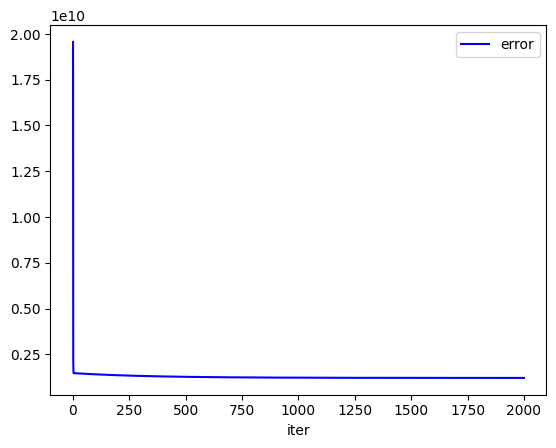

In [222]:
graficar_iter(iteration_df)

In [296]:
def graficar_modelo(x,y,iter_df, cada_cuanta, plot_xy=True):
    if(plot_xy):
        plt.scatter(x, y,  marker='.')
    counter = 1
    for i in range(0, len(iteration_df)):
        if( counter == cada_cuanta):
            plt.plot(x, iter_df.loc[i]['b0'] + iter_df.loc[i]['b1'] *x, linestyle='-')
            counter = 1
        else:
            counter +=1
    plt.show()

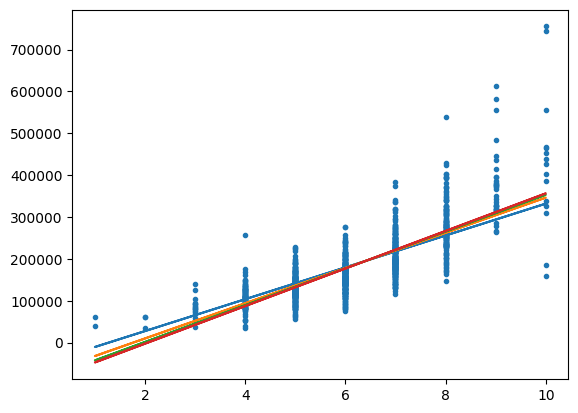

In [282]:
graficar_modelo(x,y,iteration_df,500)

In [158]:
var_elegidas = ["OverallQual", "1stFlrSF"]

In [203]:
x = df_train["OverallQual"]
y = df_train["SalePrice"]

Iteracion: 500, error: 1267240053.6803954
Iteracion: 1000, error: 1220383484.1609223
Iteracion: 1500, error: 1209624313.2734985
Iteracion: 2000, error: 1207153800.4004498


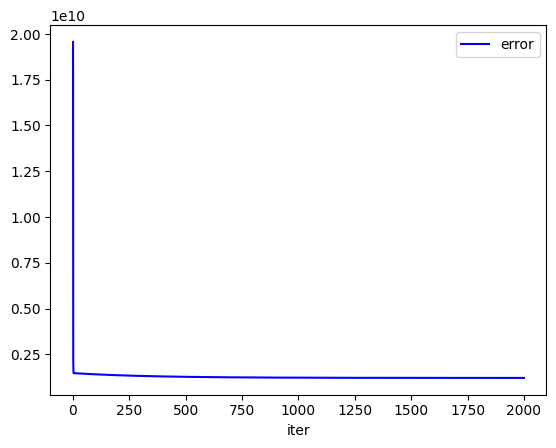

In [225]:
iteration_df = regresion_lineal(x,y,2000,0.03,0.01,0.01,500)
graficar_iter(iteration_df)

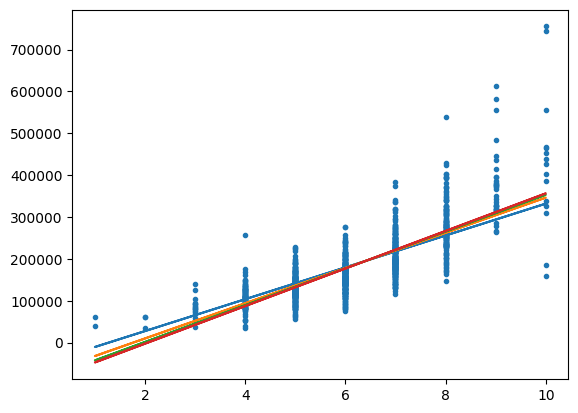

In [283]:
graficar_modelo(x,y,iteration_df,500)

In [286]:
x = df_train["1stFlrSF"]

In [228]:
B1_num = ((x - x_mean) * (y - y_mean)).sum()
B1_den = ((x - x_mean)**2).sum()
B1 = B1_num / B1_den

B0 = y_mean - (B1*x_mean)

In [229]:
B1

12.91297757553844

In [230]:
B0

180523.99742337773

Iteracion: 100, error: 2416319917.098174
Iteracion: 200, error: 2416312395.9154
Iteracion: 300, error: 2416304874.8884034
Iteracion: 400, error: 2416297354.0171947
Iteracion: 500, error: 2416289833.301763
Iteracion: 600, error: 2416282312.742108
Iteracion: 700, error: 2416274792.338224
Iteracion: 800, error: 2416267272.090111
Iteracion: 900, error: 2416259751.9977603
Iteracion: 1000, error: 2416252232.0611753


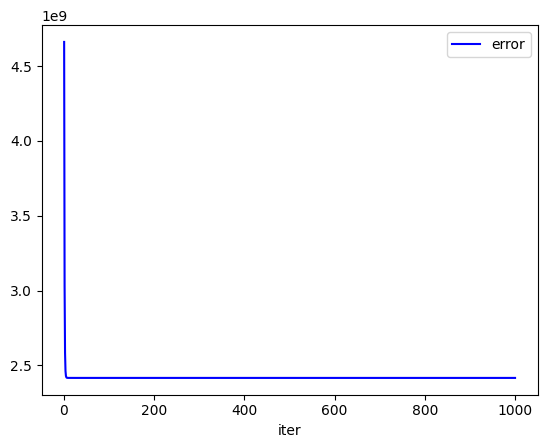

In [309]:
iteration_df = regresion_lineal(x,y,1000,0.000001,120000,5,100)
graficar_iter(iteration_df)

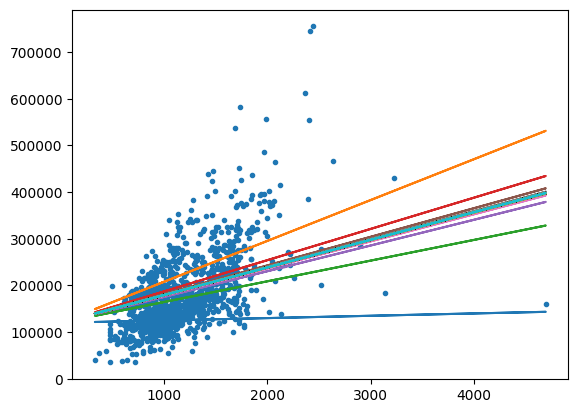

In [314]:
graficar_modelo(x,y,iteration_df,1)

## Scikit-learn

In [316]:
x = df_train["OverallQual"]
y = df_train["SalePrice"]

In [319]:
reg = LinearRegression().fit(x.values.reshape(-1,1), y.values.reshape(-1,1))

In [320]:
print( 'Intercepto: {}, Coef: {}'.format( reg.intercept_, reg.coef_ ))

Intercepto: [-97933.09205308], Coef: [[45737.344372]]


In [321]:
x = df_train["1stFlrSF"]
reg = LinearRegression().fit(x.values.reshape(-1,1), y.values.reshape(-1,1))
print( 'Intercepto: {}, Coef: {}'.format( reg.intercept_, reg.coef_ ))

Intercepto: [36259.6239443], Coef: [[123.52231136]]


In [323]:
def modelo_scikit(x,y):
    reg = LinearRegression().fit(x.values.reshape(-1,1), y.values.reshape(-1,1))
    return reg

## Promedio modelos

In [324]:
x = df_train["OverallQual"]
y = df_train["SalePrice"]

In [326]:
x_test = df_test["OverallQual"]
y_test = df_test["SalePrice"]

In [325]:
iteration_df = regresion_lineal(x,y,2000,0.03,0.01,0.01,500)
modelo_scikit = modelo_scikit(x,y)

Iteracion: 500, error: 1267240053.6803954
Iteracion: 1000, error: 1220383484.1609223
Iteracion: 1500, error: 1209624313.2734985
Iteracion: 2000, error: 1207153800.4004498


In [329]:
p1 = modelo_scikit.predict(x_test.values.reshape(-1,1))

In [356]:
p1

array([[130753.62980689],
       [130753.62980689],
       [222228.31855088],
       [222228.31855088],
       [222228.31855088],
       [130753.62980689],
       [222228.31855088],
       [222228.31855088],
       [176490.97417889],
       [176490.97417889],
       [176490.97417889],
       [176490.97417889],
       [222228.31855088],
       [176490.97417889],
       [130753.62980689],
       [176490.97417889],
       [267965.66292288],
       [222228.31855088],
       [222228.31855088],
       [176490.97417889],
       [176490.97417889],
       [222228.31855088],
       [222228.31855088],
       [ 85016.2854349 ],
       [130753.62980689],
       [267965.66292288],
       [130753.62980689],
       [130753.62980689],
       [130753.62980689],
       [176490.97417889],
       [222228.31855088],
       [222228.31855088],
       [267965.66292288],
       [176490.97417889],
       [222228.31855088],
       [222228.31855088],
       [222228.31855088],
       [130753.62980689],
       [1764

In [330]:
iteration_df.tail(1)

,iter,b1,b0,error
1999,2000.0,44891.559493,-92516.910871,1.207154e+09


In [346]:
(iteration_df).iloc[-1]

iter     2.000000e+03
b1       4.489156e+04
b0      -9.251691e+04
error    1.207154e+09
Name: 1999, dtype: float64

In [359]:
p2 = (iteration_df).iloc[-1]['b0'] + (iteration_df).iloc[-1]['b1']*x_test.values.reshape(-1,1)

In [360]:
p2

array([[131940.88659479],
       [131940.88659479],
       [221724.00558122],
       [221724.00558122],
       [221724.00558122],
       [131940.88659479],
       [221724.00558122],
       [221724.00558122],
       [176832.44608801],
       [176832.44608801],
       [176832.44608801],
       [176832.44608801],
       [221724.00558122],
       [176832.44608801],
       [131940.88659479],
       [176832.44608801],
       [266615.56507444],
       [221724.00558122],
       [221724.00558122],
       [176832.44608801],
       [176832.44608801],
       [221724.00558122],
       [221724.00558122],
       [ 87049.32710158],
       [131940.88659479],
       [266615.56507444],
       [131940.88659479],
       [131940.88659479],
       [131940.88659479],
       [176832.44608801],
       [221724.00558122],
       [221724.00558122],
       [266615.56507444],
       [176832.44608801],
       [221724.00558122],
       [221724.00558122],
       [221724.00558122],
       [131940.88659479],
       [1768

In [362]:
p1.shape

(292, 1)

In [363]:
p2.shape

(292, 1)

In [364]:
p3 = np.mean( np.array([ p1, p2 ]), axis=0 )

In [365]:
p3

array([[131347.25820084],
       [131347.25820084],
       [221976.16206605],
       [221976.16206605],
       [221976.16206605],
       [131347.25820084],
       [221976.16206605],
       [221976.16206605],
       [176661.71013345],
       [176661.71013345],
       [176661.71013345],
       [176661.71013345],
       [221976.16206605],
       [176661.71013345],
       [131347.25820084],
       [176661.71013345],
       [267290.61399866],
       [221976.16206605],
       [221976.16206605],
       [176661.71013345],
       [176661.71013345],
       [221976.16206605],
       [221976.16206605],
       [ 86032.80626824],
       [131347.25820084],
       [267290.61399866],
       [131347.25820084],
       [131347.25820084],
       [131347.25820084],
       [176661.71013345],
       [221976.16206605],
       [221976.16206605],
       [267290.61399866],
       [176661.71013345],
       [221976.16206605],
       [221976.16206605],
       [221976.16206605],
       [131347.25820084],
       [1766

In [367]:
def avg_models(manual_model, modelo_scikit, x_test):
    pred_modelo_manual = (manual_model).iloc[-1]['b0'] + (manual_model).iloc[-1]['b1']*x_test.values.reshape(-1,1)
    pred_scikit = modelo_scikit.predict(x_test.values.reshape(-1,1))
    avg_pred = np.mean( np.array([ pred_modelo_manual, pred_scikit ]), axis=0 )
    return pred_modelo_manual, pred_scikit, avg_pred
    

In [368]:
pred_modelo_manual, pred_scikit, avg_pred = avg_models(iteration_df, modelo_scikit, x_test)

In [372]:
pred_modelo_manual[0:3]

array([[131940.88659479],
       [131940.88659479],
       [221724.00558122]])

In [373]:
pred_scikit[0:3]

array([[130753.62980689],
       [130753.62980689],
       [222228.31855088]])

In [374]:
avg_pred[0:3]

array([[131347.25820084],
       [131347.25820084],
       [221976.16206605]])

In [390]:
def plot_errores(error_values, title):
    plt.plot(error_values)
    plt.title(title)
    plt.yscale('linear')
    #plt.xlabel('No. Iteracion')
    #plt.ylabel('Error')
    plt.show()

In [402]:
def err_modelos( pred_modelo_manual,pred_scikit, avg_pred, y_test):
    yt = y_test.values.reshape(-1,1)
    err_modelo_manual = (0.5/len(y_test))*(yt-pred_modelo_manual)**2
    err_scikit = (0.5/len(y_test))*(yt - pred_scikit)**2
    err_avg_pred = (0.5/len(y_test))*(yt - avg_pred)**2
    
    plot_errores(err_modelo_manual,"Modelo Manual")
    plot_errores(err_scikit,"Modelo Scikit")
    plot_errores(err_avg_pred,"Modelo Avg")
    
    print( 'Error modelo manual: {}, Error modelo scikit: {}, error modelo avg: {}'.format( sum(err_modelo_manual), sum(err_scikit), sum(err_avg_pred)))
    

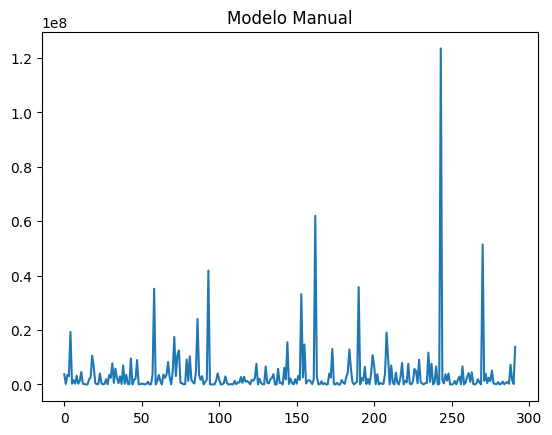

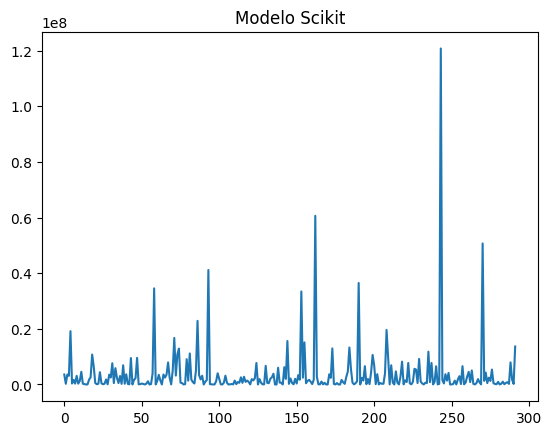

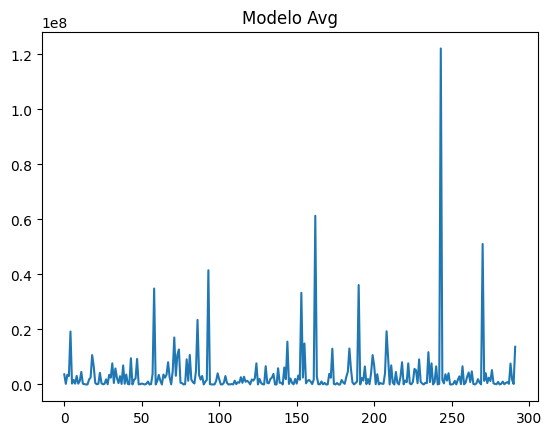

Error modelo manual: [1.07547772e+09], Error modelo scikit: [1.07713212e+09], error modelo avg: [1.07614528e+09]


In [403]:
err_modelos( pred_modelo_manual,pred_scikit, avg_pred, y_test)